In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import os
os.environ['XLA_FLAGS'] = (
    '--xla_gpu_enable_triton_softmax_fusion=true '
    '--xla_gpu_triton_gemm_any=True '
    '--xla_gpu_enable_async_collectives=true '
    '--xla_gpu_enable_latency_hiding_scheduler=true '
    '--xla_gpu_enable_highest_priority_async_stream=true '
)

os.environ['XLA_PYTHON_CLIENT_ALLOCATOR'] = ('platform')


# Train data

In [3]:
import tensorflow as tf
from src.dataPipeline.train_val import create_split
from config.data_pipeline_config import get_train_val_pipeline_config

cfg = get_train_val_pipeline_config()

options = tf.data.Options()
options.threading.private_threadpool_size = 48

dataset_path = '/home/anirudhan/project/image-fusion/data/memmaps/train_images100.tfrecords.gz'
# dataset = tf.data.TFRecordDataset(dataset_path, compression_type="GZIP").with_options(options)
# dataset = dataset.map(_parse_function).map(_reshape).map(lambda x: normalize_image(x, 'train')).map(_resize)
train_dataset, no_train_samples = create_split(dataset_path, 16, 'train', shuffle_buffer_size=5_00, cfg=cfg)
train_dataset = train_dataset.as_numpy_iterator()

2024-04-01 16:46:42.109481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [4]:
print("No of train samples:",no_train_samples)

No of train samples: 16600


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


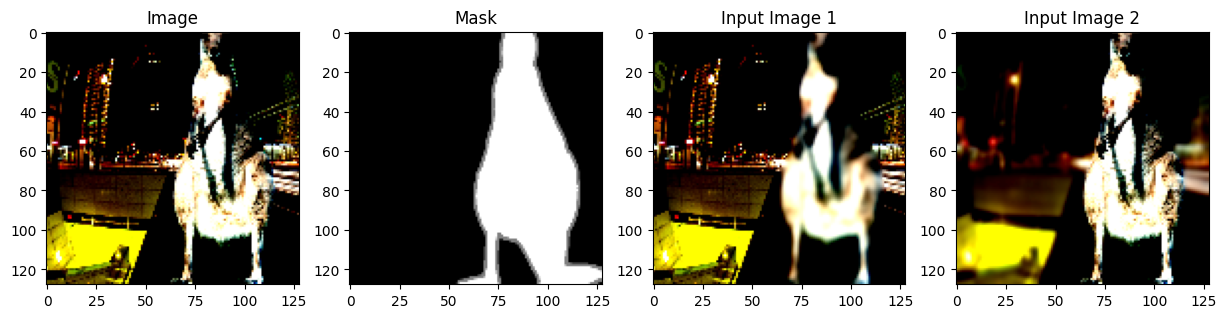

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


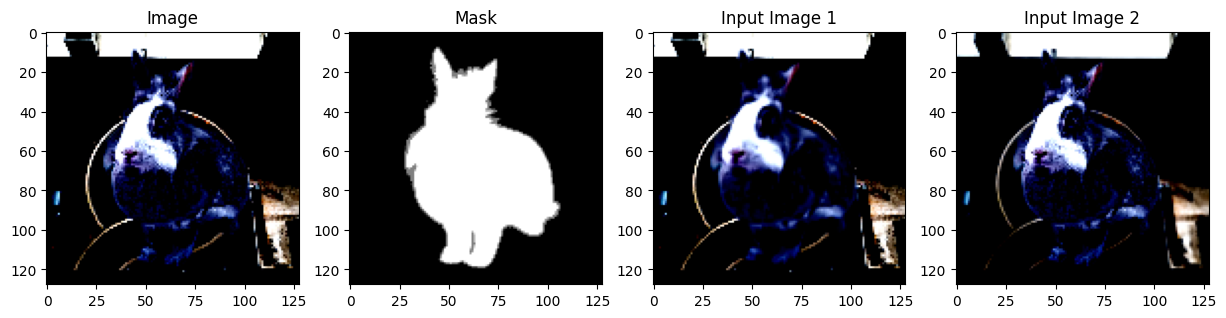

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [4]:
import tensorflow as tf
import numpy as np
import io
from PIL import Image
import matplotlib.pyplot as plt

for i, parsed_record in enumerate(train_dataset):
    # Decode all images
    # img = tf.reshape(tf.io.decode_raw(parsed_record['image'], tf.uint8), (512, 512, 3)).numpy()
    # mask = tf.reshape(tf.io.decode_raw(parsed_record['mask'], tf.uint8), (512, 512, 3)).numpy()  # Assuming similar shape
    # input_img_1 = tf.reshape(tf.io.decode_raw(parsed_record['input_img_1'], tf.uint8), (512, 512, 3)).numpy()
    # input_img_2 = tf.reshape(tf.io.decode_raw(parsed_record['input_img_2'], tf.uint8), (512, 512, 3)).numpy()
    img = parsed_record['image']
    mask = parsed_record['mask']
    input_img_1 = parsed_record['input_img_1']
    input_img_2 = parsed_record['input_img_2']
    # Create subplots with labels
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # Adjust figsize as needed
    axes[0].imshow(img[0])
    axes[0].set_title("Image")
    axes[1].imshow(mask[0])
    axes[1].set_title("Mask")
    axes[2].imshow(input_img_1[0])
    axes[2].set_title("Input Image 1")
    axes[3].imshow(input_img_2[0])
    axes[3].set_title("Input Image 2")
    plt.show()
    if i == 3 : break


# val data


In [8]:
options = tf.data.Options()
options.threading.private_threadpool_size = 48

cfg.COMPRESSION = 'GZIP'
dataset_path = '/home/anirudhan/project/image-fusion/data/memmaps/val_images.tfrecords.gz'
# dataset = tf.data.TFRecordDataset(dataset_path, compression_type="GZIP").with_options(options)
# dataset = dataset.map(_parse_function).map(_reshape).map(lambda x: normalize_image(x, 'train')).map(_resize)
val_dataset, no_train_samples = create_split(dataset_path, 16, 'val', cfg=cfg)
val_dataset = val_dataset.as_numpy_iterator()

2024-04-01 08:09:55.474564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-04-01 06:28:56.054403: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2013265920 bytes after encountering the first element of size 201326592 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


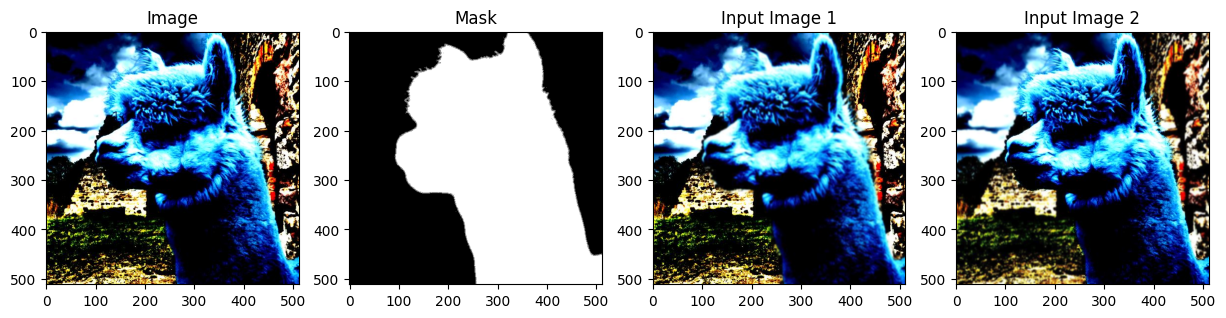

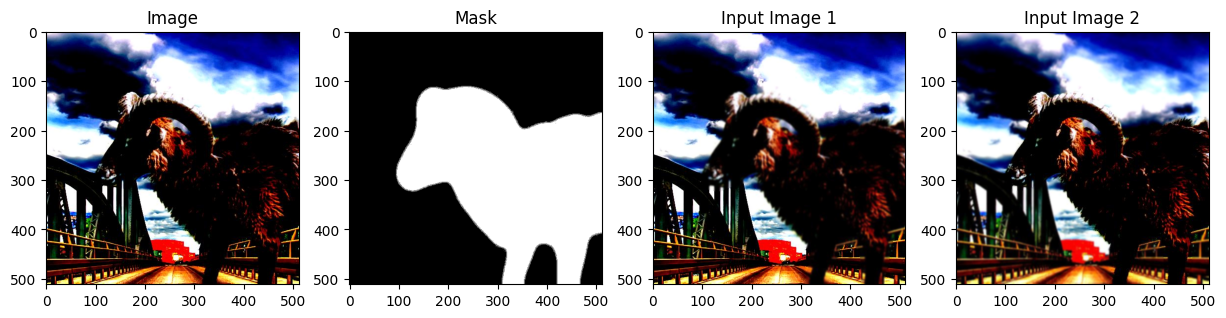

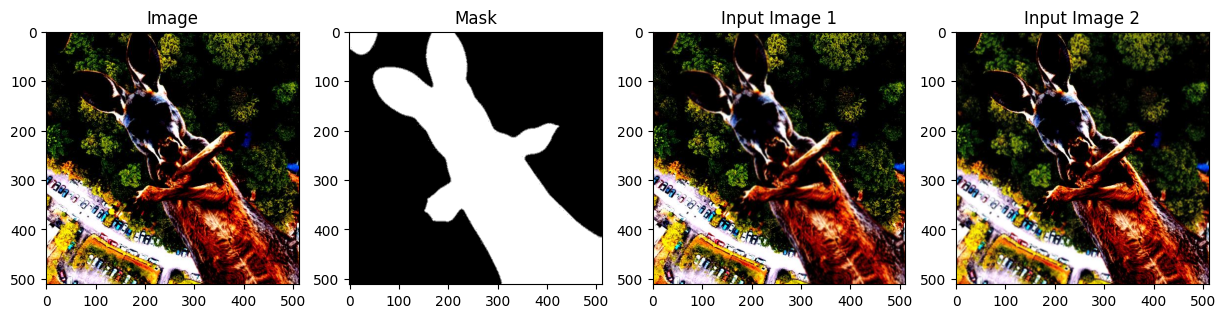

In [7]:
import tensorflow as tf
import numpy as np
import io
from PIL import Image
import matplotlib.pyplot as plt

for i, parsed_record in enumerate(val_dataset):
    # Decode all images
    # img = tf.reshape(tf.io.decode_raw(parsed_record['image'], tf.uint8), (512, 512, 3)).numpy()
    # mask = tf.reshape(tf.io.decode_raw(parsed_record['mask'], tf.uint8), (512, 512, 3)).numpy()  # Assuming similar shape
    # input_img_1 = tf.reshape(tf.io.decode_raw(parsed_record['input_img_1'], tf.uint8), (512, 512, 3)).numpy()
    # input_img_2 = tf.reshape(tf.io.decode_raw(parsed_record['input_img_2'], tf.uint8), (512, 512, 3)).numpy()
    img = parsed_record['image']
    mask = parsed_record['mask']
    input_img_1 = parsed_record['input_img_1']
    input_img_2 = parsed_record['input_img_2']
    # Create subplots with labels
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # Adjust figsize as needed
    axes[0].imshow(img[0])
    axes[0].set_title("Image")
    axes[1].imshow(mask[0])
    axes[1].set_title("Mask")
    axes[2].imshow(input_img_1[0])
    axes[2].set_title("Input Image 1")
    axes[3].imshow(input_img_2[0])
    axes[3].set_title("Input Image 2")
    plt.show()
    if i == 5 : break


# test data

In [8]:
from src.dataPipeline.test import val_data 
from config.data_pipeline_config import get_test_pipeline_config

test_cfg = get_test_pipeline_config()

test_dataset= val_data('/home/anirudhan/project/image-fusion/data/RealMFF/data.csv', batch_size=2).as_numpy_iterator()


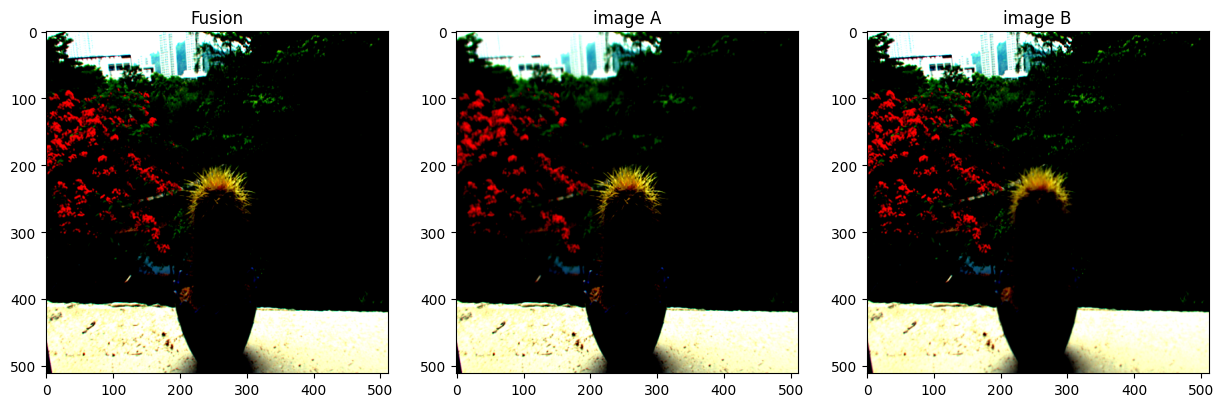

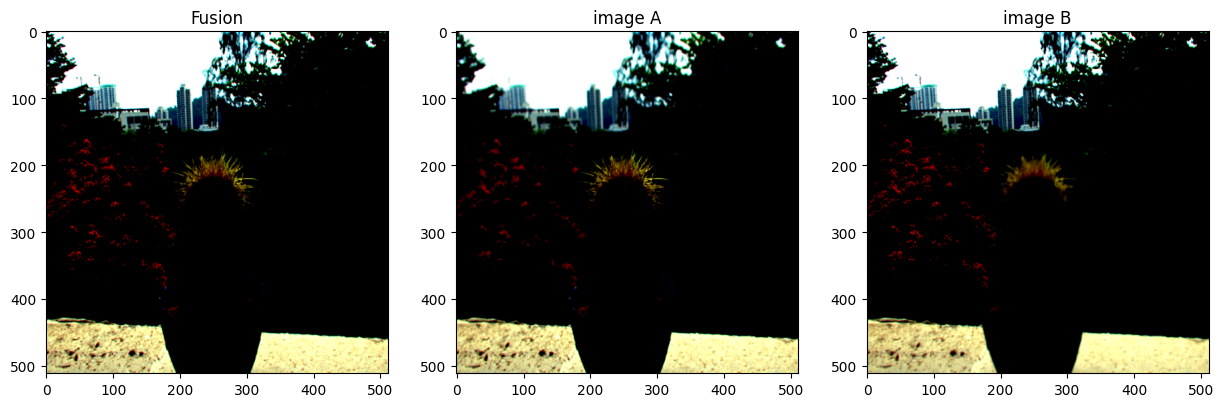

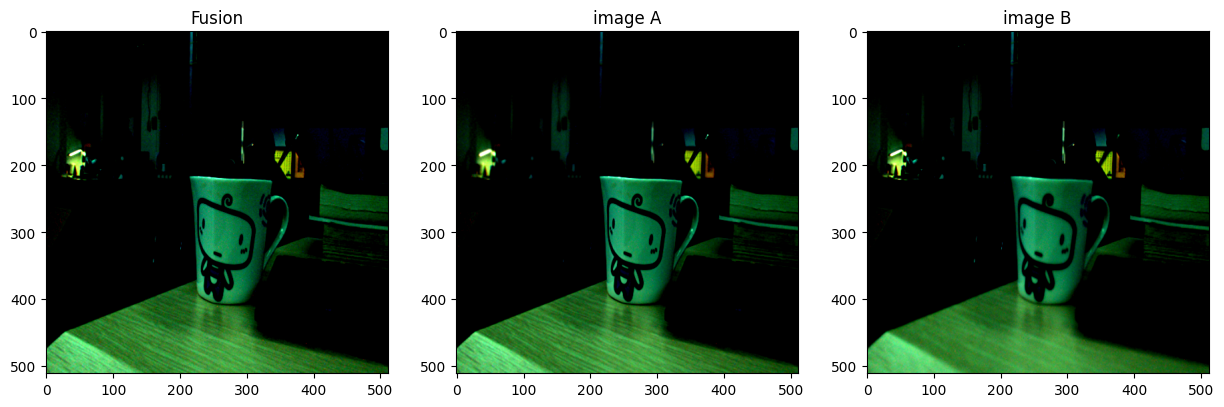

In [9]:
from matplotlib import pyplot as plt
for i, parsed_record in enumerate(test_dataset):
    # Decode all images
    # img = tf.reshape(tf.io.decode_raw(parsed_record['image'], tf.uint8), (512, 512, 3)).numpy()
    # mask = tf.reshape(tf.io.decode_raw(parsed_record['mask'], tf.uint8), (512, 512, 3)).numpy()  # Assuming similar shape
    # input_img_1 = tf.reshape(tf.io.decode_raw(parsed_record['input_img_1'], tf.uint8), (512, 512, 3)).numpy()
    # input_img_2 = tf.reshape(tf.io.decode_raw(parsed_record['input_img_2'], tf.uint8), (512, 512, 3)).numpy()
    fusion = parsed_record['Fusion']
    imageA = parsed_record['imageA']
    imageB = parsed_record['imsgeB']
    # Create subplots with labels
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed
    axes[0].imshow(fusion[0])
    axes[0].set_title("Fusion")
    axes[1].imshow(imageA[0])
    axes[1].set_title("image A")
    axes[2].imshow(imageB[0])
    axes[2].set_title("image B")
    plt.show()
    if i == 2 : break

# train

In [ ]:
import jax
import einops
import jaxwt as jwt
from functools import partial
import flax.linen as nn
from train.train import *
import jax.numpy as jnp

# model_dtype = jax.numpy.bfloat16
# Conv3x3 = partial(nn.Conv, kernel_size=(3,3), padding='SAME')
# Conv7x7 = partial(nn.Conv, kernel_size=(7,7), padding='SAME')
# rearange_width_first = lambda x: einops.rearrange(x, "n h w c -> n c h w")
# rearange_height_first = lambda x: einops.rearrange(x, "n c h w -> n c w h")
# Conv1x1 = partial(nn.Conv, padding='SAME')

# class ConvBlock(nn.Module):
#     dimention : int
#     dtype: Any = jnp.float32
#     @nn.compact
#     def __call__(self, image, train=False):
#         feature = Conv3x3(self.dimention, param_dtype=self.dtype)(image)
#         feature = nn.activation.gelu(feature)
#         feature = Conv3x3(128, param_dtype=self.dtype)(image)
#         feature = nn.activation.gelu(feature)
#         feature = Conv3x3(self.dimention, param_dtype=self.dtype)(image)
#         feature = nn.activation.gelu(feature)
#         feature = nn.BatchNorm(use_running_average = not train, param_dtype=self.dtype)(feature)
#         return feature

# class FusionModel(nn.Module):
#     dtype: Any = jnp.float32
#     @nn.compact
#     def __call__(self, image1, image2, train=False):
#         feature1 = ConvBlock(3, self.dtype)(image1, train)
#         feature2 = ConvBlock(3, self.dtype)(image2, train)
#         return feature1 + feature2

from src.fusionModel.nn.fusion import ImageFusion


In [14]:
no_train_samples = 16000

In [ ]:
from train.train import *
from flax.training import common_utils
from clu import metric_writers
from absl import logging

logging.set_verbosity(logging.INFO)

workdir = '/home/anirudhan/project/image-fusion/results/logs'
# checkpoint_manager = create_checkpoints_manager(config, '/content')
config = get_default_configs()
config.image_size = 128

writer = metric_writers.create_default_writer(
    logdir=config.log_dir
)

rng = jax.random.PRNGKey(0)

writer = metric_writers.create_default_writer(
    logdir=workdir, just_logging=jax.process_index() != 0
)

if config.batch_size % jax.device_count() > 0:
    raise ValueError('Batch size must be divisible by the number of devices')
local_batch_size = config.batch_size // jax.process_count()

steps_per_epoch = (
    no_train_samples // config.batch_size
)

if config.no_train_steps <= 0:
    num_steps = int(steps_per_epoch * config.batch_size)
else :
    num_steps = config.no_train_steps
    
steps_per_checkpoint = steps_per_epoch * 10
base_learning_rate = config.learning_rate * config.batch_size / 256.0

model = ImageFusion(18, 8, dtype=jnp.float32)

learning_rate_fn = create_learning_rate_fn(
    config, base_learning_rate, steps_per_epoch
)

# learning_rate_fn = 0.0001
state, main_key = create_train_state(rng, config, model)

step_offset = int(state.step)
#state = jax_utils.replicate(state) this should br used only if we are using multiple devices
train_step = functools.partial(train_step, learning_rate_fn=learning_rate_fn)

In [8]:
# show parameter 
tabulate_fn = nn.tabulate(
    model, rng, compute_flops=True, compute_vjp_flops=True)
x = jnp.ones((1 , 128, 128, 3))
print(tabulate_fn(x, x))


                              ImageFusion Summary                               
┏━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃ path    ┃ module  ┃ inputs  ┃ outputs ┃ flops   ┃ vjp_fl… ┃ batch_… ┃ params ┃
┡━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩
│         │ ImageF… │ -       │ float3… │ 531556… │ 158239… │         │        │
│         │         │ float3… │         │         │         │         │        │
│         │         │ -       │         │         │         │         │        │
│         │         │ float3… │         │         │         │         │        │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────┤
│ encder  │ Freque… │ -       │ float3… │ 711399… │ 208021… │         │        │
│ image 1 │         │ float3… │         │         │         │         │        │
│ level_0 │         │ - False │         │         │         │         │        │
├─────────┼─────────┼──────

In [4]:
rng = rng = jax.random.PRNGKey(0)
model = FusionModel(dtype=jnp.bfloat16)
params = model.init(rng, jnp.ones((1, 128, 128, 3), dtype=jnp.bfloat16), jnp.ones((1, 128, 128, 3), dtype=jnp.bfloat16), train=True)

In [10]:
print(jax.tree_map(lambda x: x.dtype, state.params))

{'Conv_0': {'bias': dtype('float32'), 'kernel': dtype('float32')}, 'ScaleImage_0': {'BatchNorm_0': {'bias': dtype('float32'), 'scale': dtype('float32')}, 'Conv_0': {'bias': dtype('float32'), 'kernel': dtype('float32')}, 'Conv_1': {'bias': dtype('float32'), 'kernel': dtype('float32')}}, 'ScaleImage_1': {'BatchNorm_0': {'bias': dtype('float32'), 'scale': dtype('float32')}, 'Conv_0': {'bias': dtype('float32'), 'kernel': dtype('float32')}, 'Conv_1': {'bias': dtype('float32'), 'kernel': dtype('float32')}}, 'ScaleImage_2': {'BatchNorm_0': {'bias': dtype('float32'), 'scale': dtype('float32')}, 'Conv_0': {'bias': dtype('float32'), 'kernel': dtype('float32')}, 'Conv_1': {'bias': dtype('float32'), 'kernel': dtype('float32')}}, 'ScaleImage_3': {'BatchNorm_0': {'bias': dtype('float32'), 'scale': dtype('float32')}, 'Conv_0': {'bias': dtype('float32'), 'kernel': dtype('float32')}, 'Conv_1': {'bias': dtype('float32'), 'kernel': dtype('float32')}}, 'ScaleImage_4': {'BatchNorm_0': {'bias': dtype('float

In [4]:
model

ImageFusion(
    # attributes
    head_dim = 3
    no_heads = 2
    levels = 3
    patch_size = 8
    dtype = bfloat16
    encoder = functools.partial(<class 'src.fusionModel.nn.fusion.FrequencyTransformer'>, dim=8, n_heads=8, patch_size=8, dtype=<class 'jax.numpy.float32'>)
    decoder = functools.partial(<class 'src.fusionModel.nn.fusion.FrequencyTransformer'>, dim=8, n_heads=8, patch_size=8, encoder=False, mlp=True, dtype=<class 'jax.numpy.float32'>)
    encoder_fusion = functools.partial(<class 'src.fusionModel.nn.fusion.FrequencyFusionBlock'>, dim=8, heads=8, patch_size=8, dtype=<class 'jax.numpy.float32'>)
)

In [9]:
train_metrics = []

# if jax.process_index() == 0:
#     hooks += [periodic_actions.Profile(num_profile_steps=5, logdir=workdir)]

train_metrics_last_t = time.time()
train_iter = create_input_iter(train_dataset)
# eval_iter = create_input_iter(val_dataset)

logging.info('Initial compilation, this might take some minutes...')
for step, train_batch in zip(range(step_offset, num_steps), train_iter):
    main_key, subkey = jax.random.split(main_key)
    state, metrics = train_step(state, train_batch, dropout_key=main_key)
    # metrics['eval loss'] = eval_step(state, eval_batch)
    writer.write_scalars(step, metrics)
    logging.info(f'Step {step}: {metrics}')
        
    if step == step_offset:
        logging.info('Initial compilation completed.')

    if config.get('log_every_steps'):
        train_metrics.append(metrics['train loss'])
        # if (step + 1) % config.log_every_steps == 0:
        #     summary = {
        #         f'train_{k}': v
        #         for k, v in jax.tree_util.tree_map(lambda x: x.mean(), train_metrics)#.items()
        #     }
        #     summary['steps_per_second'] = config.log_every_steps / (time.time() - train_metrics_last_t)
        #     writer.write_scalars(step + 1, summary)
        #     train_metrics = []
        #     train_metrics_last_t = time.time()

    # if (step + 1) % steps_per_epoch == 0:
    #     epoch = step // steps_per_epoch
    #     eval_metrics = []
    #     for i, batch in zip(range(10), eval_iter):
    #         eval_metrics.append(eval_step(state, batch))
    #     metrics['val_loss'] = jax.tree_util.tree_map(lambda x: x.mean(), eval_metrics)
    #     metrics['train_loss'] = jax.tree_util.tree_map(lambda x: x.mean(), train_metrics)
    #     eval_metrics = []
    #     train_metrics = []
    #     writer.write_scalars(step, metrics)
    #     logging.info(f'Step {step}: {metrics}')
        # sync batch statistics across replicas
        # state = sync_batch_stats(state)

    if step == no_train_samples // config.batch_size * config.epochs - 1:
        break


INFO:absl:Initial compilation, this might take some minutes...


/home/anirudhan/miniconda3/envs/fusion/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:914: UserWarning: Some donated buffers were not usable: ShapedArray(float32[16,128,128,3]), ShapedArray(float32[16,128,128,3]), ShapedArray(float32[16,128,128,3]), ShapedArray(uint32[2]).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
2024-04-01 16:42:52.873160: W external/xla/xla/service/hlo_rematerialization.cc:2941] Can't reduce memory use below 8.79GiB (9435093935 bytes) by rematerialization; only reduced to 12.26GiB (13168507245 bytes), down from 14.64GiB (15724827853 bytes) originally
E0401 16:43:02.679956   47019 pjrt_stream_executor_client.cc:2804] Execution of replica 0 failed: RESOURCE_EXHAUSTED: Failed to allocate request for 12.21GiB (13108797944B) on device ordinal 0
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:  158.35MiB
              con

XlaRuntimeError: RESOURCE_EXHAUSTED: Failed to allocate request for 12.21GiB (13108797944B) on device ordinal 0
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:  158.35MiB
              constant allocation:       184B
        maybe_live_out allocation:  149.36MiB
     preallocated temp allocation:   12.21GiB
  preallocated temp fragmentation:   95.09MiB (0.76%)
                 total allocation:   12.36GiB
              total fragmentation:  101.33MiB (0.80%)
Peak buffers:
	Buffer 1:
		Size: 432.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_0/Conv_3/conv_general_dilated[window_strides=(1, 1) padding=((0, 0), (0, 0)) lhs_dilation=(1, 1) rhs_dilation=(1, 1) dimension_numbers=ConvDimensionNumbers(lhs_spec=(0, 3, 1, 2), rhs_spec=(3, 2, 0, 1), out_spec=(0, 3, 1, 2)) feature_group_count=1 batch_group_count=1 precision=None preferred_element_type=None]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=261
		XLA Label: custom-call
		Shape: f32[16,432,128,128]
		==========================

	Buffer 2:
		Size: 432.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_0/Dense_0/dot_general[dimension_numbers=(((6,), (0,)), ((), ())) precision=None preferred_element_type=None]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=282
		XLA Label: custom-call
		Shape: c64[1572864,36]
		==========================

	Buffer 3:
		Size: 432.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_0/Conv_2/conv_general_dilated[window_strides=(1, 1) padding=((0, 0), (0, 0)) lhs_dilation=(1, 1) rhs_dilation=(1, 1) dimension_numbers=ConvDimensionNumbers(lhs_spec=(0, 3, 1, 2), rhs_spec=(3, 2, 0, 1), out_spec=(0, 3, 1, 2)) feature_group_count=1 batch_group_count=1 precision=None preferred_element_type=None]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=260
		XLA Label: custom-call
		Shape: f32[16,432,128,128]
		==========================

	Buffer 4:
		Size: 432.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_0/Dense_1/dot_general[dimension_numbers=(((6,), (0,)), ((), ())) precision=None preferred_element_type=None]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=283
		XLA Label: custom-call
		Shape: c64[1572864,36]
		==========================

	Buffer 5:
		Size: 432.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_0/Dense_2/dot_general[dimension_numbers=(((6,), (0,)), ((), ())) precision=None preferred_element_type=None]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=284
		XLA Label: custom-call
		Shape: c64[1572864,36]
		==========================

	Buffer 6:
		Size: 432.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_0/Dense_3/dot_general[dimension_numbers=(((6,), (0,)), ((), ())) precision=None preferred_element_type=None]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=285
		XLA Label: custom-call
		Shape: c64[1572864,36]
		==========================

	Buffer 7:
		Size: 288.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/decoder fusion block level_0/conv1x1/conv_general_dilated[window_strides=(1, 1) padding=((0, 0), (0, 0)) lhs_dilation=(1, 1) rhs_dilation=(1, 1) dimension_numbers=ConvDimensionNumbers(lhs_spec=(0, 3, 1, 2), rhs_spec=(3, 2, 0, 1), out_spec=(0, 3, 1, 2)) feature_group_count=1 batch_group_count=1 precision=None preferred_element_type=None]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=321
		XLA Label: custom-call
		Shape: f32[16,288,128,128]
		==========================

	Buffer 8:
		Size: 288.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_0/Conv_6/conv_general_dilated[window_strides=(1, 1) padding=((0, 0), (0, 0)) lhs_dilation=(1, 1) rhs_dilation=(1, 1) dimension_numbers=ConvDimensionNumbers(lhs_spec=(0, 3, 1, 2), rhs_spec=(3, 2, 0, 1), out_spec=(0, 3, 1, 2)) feature_group_count=1 batch_group_count=1 precision=None preferred_element_type=None]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=307
		XLA Label: custom-call
		Shape: f32[16,288,128,128]
		==========================

	Buffer 9:
		Size: 288.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_0/jit(fft)/fft[fft_type=FftType.IRFFT fft_lengths=(4, 4)]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=291
		XLA Label: fft
		Shape: f32[16,8,36,32,32,4,4]
		==========================

	Buffer 10:
		Size: 288.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_0/jit(fft)/fft[fft_type=FftType.IRFFT fft_lengths=(4, 4)]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=291
		XLA Label: fft
		Shape: f32[16,8,36,32,32,4,4]
		==========================

	Buffer 11:
		Size: 288.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/decoder fusion block level_0/FrequencyTransformer_0/LayerNorm_0/add" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=213
		XLA Label: fusion
		Shape: f32[16,288,128,128]
		==========================

	Buffer 12:
		Size: 216.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_0/transpose[permutation=(0, 1, 3, 4, 5, 6, 2)]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=270
		XLA Label: fusion
		Shape: c64[16,8,32,32,4,3,18]
		==========================

	Buffer 13:
		Size: 216.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_1/Dense_1/dot_general[dimension_numbers=(((6,), (0,)), ((), ())) precision=None preferred_element_type=None]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=283
		XLA Label: custom-call
		Shape: c64[393216,72]
		==========================

	Buffer 14:
		Size: 216.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_1/Dense_2/dot_general[dimension_numbers=(((6,), (0,)), ((), ())) precision=None preferred_element_type=None]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=284
		XLA Label: custom-call
		Shape: c64[393216,72]
		==========================

	Buffer 15:
		Size: 216.00MiB
		Operator: op_name="jit(train_step)/jit(main)/jvp(ImageFusion)/fusion block level_1/Dense_3/dot_general[dimension_numbers=(((6,), (0,)), ((), ())) precision=None preferred_element_type=None]" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=285
		XLA Label: custom-call
		Shape: c64[393216,72]
		==========================



In [11]:
import matplotlib.pyplot as plt

In [12]:
image = train_batch['image'].astype('float32')

In [13]:
image1 = train_batch['input_img_1'].astype('float32')
image2 = train_batch['input_img_2'].astype('float32')

In [14]:
fusion = model.apply({'params':state.params, 'batch_stats':state.batch_stats}, image1, image2, train=False)
plt.imshow(fusion[1])

E0401 16:33:52.297862   40380 pjrt_stream_executor_client.cc:2804] Execution of replica 0 failed: RESOURCE_EXHAUSTED: Failed to allocate request for 1.69GiB (1811939328B) on device ordinal 0
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:    1.69GiB
              constant allocation:         0B
        maybe_live_out allocation:    1.69GiB
     preallocated temp allocation:         0B
                 total allocation:    3.38GiB
              total fragmentation:         0B (0.00%)
Peak buffers:
	Buffer 1:
		Size: 1.69GiB
		Entry Parameter Subshape: c64[16,64,32,32,4,3,18]

	Buffer 2:
		Size: 1.69GiB
		Operator: op_name="jit(fn)/jit(main)/add" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=281
		XLA Label: fusion
		Shape: c64[16,64,32,32,4,3,18]

	Buffer 3:
		Size: 144B
		Entry Parameter Subshape: c64[1,1,1,1,1,1,18]




XlaRuntimeError: RESOURCE_EXHAUSTED: Failed to allocate request for 1.69GiB (1811939328B) on device ordinal 0
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:    1.69GiB
              constant allocation:         0B
        maybe_live_out allocation:    1.69GiB
     preallocated temp allocation:         0B
                 total allocation:    3.38GiB
              total fragmentation:         0B (0.00%)
Peak buffers:
	Buffer 1:
		Size: 1.69GiB
		Entry Parameter Subshape: c64[16,64,32,32,4,3,18]
		==========================

	Buffer 2:
		Size: 1.69GiB
		Operator: op_name="jit(fn)/jit(main)/add" source_file="/home/anirudhan/project/image-fusion/src/fusionModel/nn/fusion.py" source_line=281
		XLA Label: fusion
		Shape: c64[16,64,32,32,4,3,18]
		==========================

	Buffer 3:
		Size: 144B
		Entry Parameter Subshape: c64[1,1,1,1,1,1,18]
		==========================



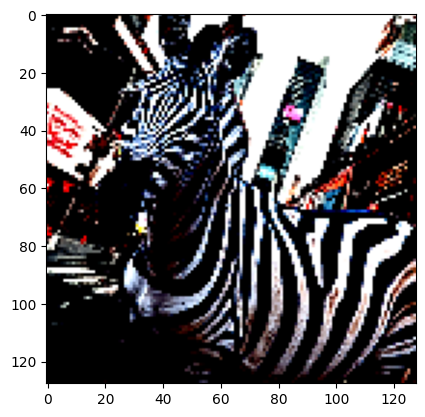

In [15]:
plt.imshow(image[1])

In [8]:
plt.imshow(image1[1])

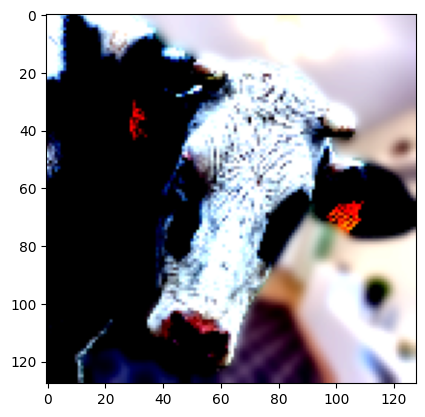

In [9]:
plt.imshow(image2[1])

In [7]:
state.keys()

AttributeError: 'TrainState' object has no attribute 'keys'

In [8]:
state.step

0

In [18]:
config.get('log_every_steps')

In [19]:
config

a: 0.5
batch_size: 32
e: 0.001
epochs: 20
half_precision: true
image_size: 128
keep_checkpoints: 3
learning_rate: 0.1
level: 1
log_frequency: 10
momentum: 0.9
no_train_steps: -1
warmup_epochs: 5

In [28]:
params = model.init(rng, image1=np.ones((1, 128, 128, 3)), image2=np.ones((1, 128, 128, 3), dtype=np.float32))

In [8]:
image_shape = (1, config.image_size, config.image_size, 3)
jnp.ones(image_shape, dtype=jnp.float32).shape

(1, 128, 128, 3)

In [5]:
jax.tree_map(lambda x: x.dtype, state.params)

{'ConvBlock_0': {'BatchNorm_0': {'bias': dtype('float32'),
   'scale': dtype('float32')},
  'Conv_0': {'bias': dtype('float32'), 'kernel': dtype('float32')}},
 'ConvBlock_1': {'BatchNorm_0': {'bias': dtype('float32'),
   'scale': dtype('float32')},
  'Conv_0': {'bias': dtype('float32'), 'kernel': dtype('float32')}}}

In [ ]:
# checkpoint_manager = create_checkpoints_manager(config, '/content/checkpoints')
# # state = restore_last_checkpoint(checkpoint_manager)
# # step_offset > 0 if restarting from checkpoint
# step_offset = int(state.step)
# state = jax_utils.replicate(state)

# # p_train_step = jax.pmap(
# #     functools.partial(train_step, learning_rate_fn=learning_rate_fn),
# #     axis_name='batch',
# # )
# train_step = functools.partial(train_step, learning_rate_fn=learning_rate_fn)
# # p_eval_step = jax.pmap(eval_step, axis_name='batch')

# train_metrics = []
# hooks = []
# if jax.process_index() == 0:
#     hooks += [periodic_actions.Profile(num_profile_steps=5, logdir=workdir)]
# train_metrics_last_t = time.time()
# train_iter = create_input_iter(numpy_train_data)

# logging.info('Initial compilation, this might take some minutes...')
# for step, batch in zip(range(step_offset, num_steps), train_iter):
#     state, metrics = train_step(state, batch)
#     logging.info(f'Step {step}: {metrics}')
#     for h in hooks:
#         h(step)

#     if step == step_offset:
#         logging.info('Initial compilation completed.')

#     if config.get('log_every_steps'):
#         train_metrics.append(metrics)
#         if (step + 1) % config.log_every_steps == 0:
#             train_metrics = common_utils.get_metrics(train_metrics)
#             summary = {
#                 f'train_{k}': v
#                 for k, v in jax.tree_util.tree_map(
#                     lambda x: x.mean(), train_metrics
#                 ).items()
#             }
#             summary['steps_per_second'] = config.log_every_steps / (
#                 time.time() - train_metrics_last_t
#             )
#             writer.write_scalars(step + 1, summary)
#             train_metrics = []
#             train_metrics_last_t = time.time()

#     if (step + 1) % steps_per_epoch == 0:
#         epoch = step // steps_per_epoch
#         eval_metrics = []

#         # sync batch statistics across replicas
#         state = sync_batch_stats(state)

#     if step == no_train_samples // config.batch_size * config.epochs - 1: break